<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/gmmbic_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import skimage as sk
from skimage import io

I = sk.io.imread('/content/standardboard.png')

In [10]:
I.shape

(801, 801, 4)

In [11]:
from skimage.color import rgb2gray

IG = rgb2gray(I[:,:,0:3])

In [12]:
IG.shape

(801, 801)

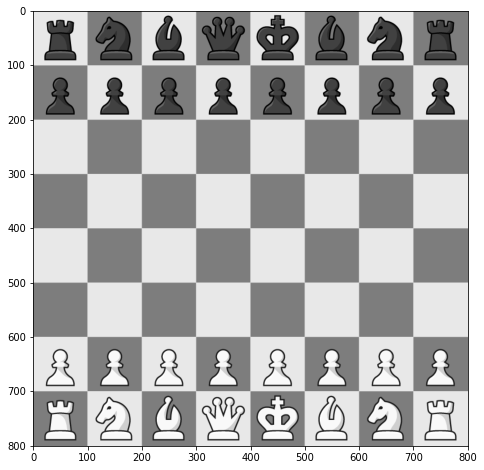

In [16]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,8))
plt.imshow(IG,cmap='gray')
plt.show()

In [22]:
v = IG.reshape(IG.shape[0]*IG.shape[1],1)
v.shape

(641601, 1)

In [23]:
from sklearn.datasets import make_blobs
import numpy as np
from sklearn import mixture

NMAX = 10
bic = []
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(v)
    bic.append(gmm.bic(v))
    print(bic)

idx_winner = np.argmin(bic)
print('...and the winner is GMM model G = {}'.format(idx_winner+1))
gmm = mixture.GaussianMixture(n_components=idx_winner+1,covariance_type='full').fit(v)



[-85373.16571739067]
[-85373.16571739067, -1152960.5752667873]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166364.139055686]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166364.139055686, -5367666.34733475]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166364.139055686, -5367666.34733475, -5424890.786125756]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166364.139055686, -5367666.34733475, -5424890.786125756, -5562527.234584029]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166364.139055686, -5367666.34733475, -5424890.786125756, -5562527.234584029, -5590931.083391358]
[-85373.16571739067, -1152960.5752667873, -5073618.713245837, -5159698.220792447, -5166

In [25]:
v_pred_gmm = gmm.predict(v)

In [26]:
v_pred_gmm.shape

(641601,)

In [27]:
IFINAL = v_pred_gmm.reshape(IG.shape[0],IG.shape[1])

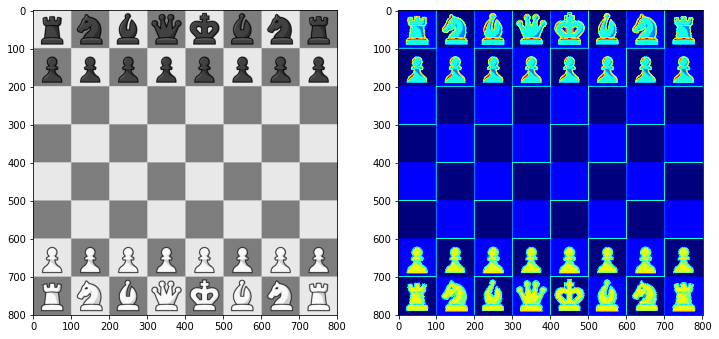

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(IG,cmap='gray')
plt.subplot(122)
plt.imshow(IFINAL,cmap='jet')
plt.show()